# K Means Clustering com Python


## Método usado

K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Então, o algoritmo itera através de duas etapas:
Reatribui pontos ao cluster cujo centroide é o mais próximo e calcula o novo centróide de cada cluster. Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida. A variação dentro do cluster é calculada como a soma da distância euclidiana entre os pontos de dados e seus respectivos centroides do cluster.

## Importa bibliotecas

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Cria dados

In [27]:
from sklearn.datasets import make_blobs

In [28]:
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [31]:
pd.DataFrame(data)

,0
0,"[[-6.428840947998266, 10.141117387887057], [5...."
1,"[3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, ..."


In [10]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

## Visualizando os dados data

In [24]:
len(data[0][:,0])

200

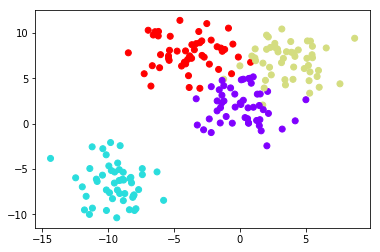

In [11]:
plt.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],
            cmap='rainbow')

## Criando os clusters

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4)

In [14]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [16]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3], dtype=int32)

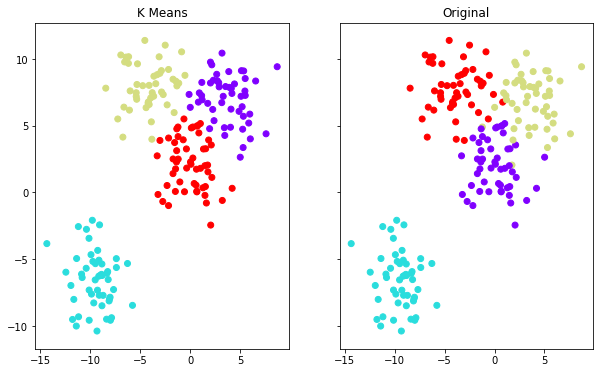

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

Você deve notar que as cores não têm relação entre as duas parcelas